In [ ]:
!pip install pyshp
!pip install geopandas
!pip install chart_studio
!pip install imblearn

In [1]:
import src

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import shapefile as shp
import seaborn as sns
import geopandas as gpd
import json, bokeh, datetime, chart_studio.plotly
import plotly.graph_objs as go
import plotly.offline as pyo
#import warnings

import sklearn as sk
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler

from plotly.offline import iplot
from collections import Counter
from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool, Plot, Range1d, BasicTickFormatter, LinearAxis, LogTicker, FixedTicker, FuncTickFormatter
from bokeh.palettes import brewer
from IPython.display import set_matplotlib_formats

In [2]:
PATH_ROOT =  './' #change dir to your project folder
DATA_ROOT = PATH_ROOT+'data/'


In [3]:
data_processed = pd.read_csv(DATA_ROOT+"data_processed.csv")

In [4]:
assault = ["INTIMATE PARTNER - ASSAULT","BATTERY - SIMPLE ASSAULT","RAPE", "ASSAULT WITH DEADLY WEAPON",
           "CRIMINAL THREATS - NO WEAPON DISPLAYED","BATTERY WITH SEXUAL CONTACT","CHILD ABUSE (PHYSICAL)",
           "OTHER ASSAULT","CHILD ANNOYING (17YRS & UNDER)","BATTERY ON OFFICER",
           "SEXUAL PENTRATION WITH A FOREIGN OBJECT","THEFT OF IDENTITY","CRIME AGAINST CHILD","KIDNAPPING",
           "THREATENING PHONE CALLS/LETTERS","CHILD NEGLECT (SEE 300 W.I.C.)","CHILD STEALING",
           "CHILD ABANDONMENT","LYNCHING"]
Theft = ["EMBEZZLEMENT THEFT", "THEFT PLAIN", "SHOPLIFTING", "DOCUMENT FORGERY / STOLEN FELONY","BIKE - STOLEN",
         "THEFT OF SERVICES","THEFT, PERSON","EXTORTION","PURSE SNATCHING","BUNCO THIEF","PICKPOCKET",
         "CREDIT CARDS, FRAUD USE","DISHONEST EMPLOYEE THEFT","THEFT, COIN MACHINE","TILL TAP",
         "GRAND THEFT / INSURANCE FRAUD","BOAT - STOLEN"]
Robbery = ["ROBBERY"]
Burglary = ["BURGLARY","UNAUTHORIZED COMPUTER ACCESS"]
Motor_Vehicle= ["THROWING OBJECT AT MOVING VEHICLE","THEFT FROM MOTOR VEHICLE","VEHICLE - STOLEN",
                 "RECKLESS DRIVING","DRIVING WITHOUT OWNER CONSENT (DWOC)","GRAND THEFT / AUTO REPAIR",
                 "PETTY THEFT - AUTO REPAIR"]
Arson = ["VANDALISM","ARSON","TELEPHONE PROPERTY - DAMAGE"]
Homicide = ["CRIMINAL HOMICIDE","MANSLAUGHTER, NEGLIGENT",]
Vice = ["STALKING","INDECENT EXPOSURE","LETTERS, LEWD","CRUELTY TO ANIMALS","LEWD CONDUCT","PROWLER",
        "PEEPING TOM","SEX, UNLAWFUL","ORAL COPULATION","BEASTIALITY, CRIME AGAINST NATURE","BIGAMY","INCEST"]
Violence = ["BOMB SCARE","DISTURBING THE PEACE","SHOTS FIRED","BRANDISH WEAPON","RESISTING ARREST",
            "WEAPONS POSSESSION/BOMBING","FAILURE TO YIELD","DRUNK ROLL","DISRUPT SCHOOL","INCITING A RIOT",
            "BLOCKING DOOR INDUCTION CENTER"]
Others = ["TRESPASSING","COUNTERFEIT","OTHER MISCELLANEOUS CRIME","VIOLATION OF COURT ORDER","FALSE IMPRISONMENT",
          "PIMPING","BRIBERY","ILLEGAL DUMPING","FALSE POLICE REPORT","ABORTION/ILLEGAL","CONTRIBUTING",
          "PANDERING","TILL TAP","REPLICA FIREARMS","CONTEMPT OF COURT","CONSPIRACY","TRAIN WRECKING",
          "DRUGS, TO A MINOR","DOCUMENT WORTHLESS", "FAILURE TO DISPERSE"]

In [ ]:
def group_crimes(crime):
    if(crime in assault):
        return 'Assault'
    if(crime in Theft):
        return 'Theft'
    if(crime in Robbery):
        return 'Robbery'
    if(crime in Burglary):
        return 'Burglary'
    if(crime in Motor_Vehicle):
        return 'Motor Vehicle'
    if(crime in Arson):
        return 'Arson'
    if(crime in Homicide):
        return 'Homicide'
    if(crime in Vice):
        return 'Vice'
    if(crime in Violence):
        return 'Violence'
    if(crime in Others):
        return 'Others'
    return crime

data_processed['Crime Code Description'] = data_processed['Crime Code Description'].apply(lambda c: group_crimes(c))



In [ ]:
data_ml=data_processed[['Year','Hour','Month','Crime Code Description','Cell Nb']]
data_ml=data_ml.reset_index(drop=True)
data_ml.sample(10)

In [ ]:
dummies=pd.get_dummies(data_ml["Crime Code Description"],prefix="Crime")
data_ml = pd.concat([data_ml, dummies], axis=1)
data_ml=data_ml.drop(columns="Crime Code Description")
data_ml= data_ml.rename(columns={'Cell Nb': 'Cell_Nb'})


data_ml.sample()


In [ ]:
years=data_ml.Year.tolist()
years=sorted(list(set(years)))
years.remove(2017)
months=data_ml.Month.tolist()
months=sorted(list(set(months)))

cell_nb_ml=data_ml.Cell_Nb.tolist()
cell_nb_ml=list(set(cell_nb_ml))
cell_nb = sorted(cell_nb_ml)

**t-month for the whole dataset**

In [ ]:
feature_cols = ["Crime_Arson","Crime_Assault","Crime_Burglary","Crime_Homicide","Crime_Motor Vehicle","Crime_Others","Crime_Robbery","Crime_Theft","Crime_Vice","Crime_Violence"]
cells_h=108
years=[2015,2016]
#months=[1,2,3,4,5,6]
t_m=2

new_df= pd.DataFrame()
for y in years:
    df_year= pd.DataFrame()
    data_y=data_ml[data_ml['Year']==y]

    for m in range(1, len(months)-t_m+1):
        df_month= pd.DataFrame()
        data_cm=data_y[data_y['Month'].isin(list(range(1,m+t_m)))]
        data_fm=data_y[data_y['Month']==m+t_m]
        data_fm= data_fm.rename(columns={'Crime_Burglary': 'y'})
        for i in cell_nb:
            cell = data_cm.loc[(data_cm['Cell_Nb'] == i), feature_cols].sum()
    
        #n1 = data_cm.loc[(data_cm['Cell_Nb'] == i-cells_h-1), feature_cols].sum()
        #n2 = data_cm.loc[(data_cm['Cell_Nb'] == i-cells_h), feature_cols].sum()
        #n3 = data_cm.loc[(data_cm['Cell_Nb'] == i-cells_h+1), feature_cols].sum()
        #n4 = data_cm.loc[(data_cm['Cell_Nb'] == i-1), feature_cols].sum()
        #n5 = data_cm.loc[(data_cm['Cell_Nb'] == i+1), feature_cols].sum()
        #n6 = data_cm.loc[(data_cm['Cell_Nb'] == i+cells_h-1), feature_cols].sum()
        #n7 = data_cm.loc[(data_cm['Cell_Nb'] == i+cells_h), feature_cols].sum()
        #n8 = data_cm.loc[(data_cm['Cell_Nb'] == i+cells_h+1), feature_cols].sum()
    
        #lists_of_lists = [cell,n1,n2,n3,n4,n5,n6,n7,n8]
        #moore=[sum(x) for x in zip(*lists_of_lists)]
        #moore=[x / 9 for x in moore]
    
            df_cm_cell = pd.DataFrame([cell])
        #df_moore = pd.DataFrame([moore])
        #df_moore.columns = feature_cols
    
            fm_cell = data_fm.loc[(data_fm['Cell_Nb'] == i), ["y"]].sum()
            df_fm_cell = pd.DataFrame([fm_cell])
    
            df_cell = pd.concat([df_cm_cell, df_fm_cell], axis=1)
        #df_cell = pd.concat([df_moore, df_fm_cell], axis=1)
        
            df_cell.insert(0,"Cell_Nb", [i], True)
            df_cell.insert(1,"Month", [m], True)
            df_cell.insert(3,'ForMonth',[m+t_m], True)
            df_cell.insert(2,"Year", [y], True)
            
            df_month = pd.concat([df_month, df_cell])
    
        df_year= pd.concat([df_year, df_month])
    
    new_df = pd.concat([new_df, df_year])




**Write in csv**

In [ ]:
new_df.to_csv('data/df_ml.csv', index=False) 

In [6]:
new_df1 = pd.read_csv(DATA_ROOT+"df_ml.csv") 

In [7]:
new_df1['y'] = new_df1['y'].map(lambda s: 0 if s==0 else 1)

**Metrics**

In [8]:
def accuracy(TP, TN, FP, FN):
  return (TP + TN) / (TP + TN + FP + FN)

def recall(TP, TN, FP, FN):
  return TP/(TP + FN)

def specificity(TP, TN, FP, FN):
  return TN/(TN + FP)

def fall_out(TP, TN, FP, FN):
  return FP/(TN + FP)

def precision(TP, TN, FP, FN):
  return TP/(TP + FP)

def f1(TP, TN, FP, FN):
  prec = precision(TP, TN, FP, FN)
  reca = recall(TP, TN, FP, FN)
  return 2 * (prec * reca)/(prec + reca)

**Decision Tree**

In [9]:
#decision tree method
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import sklearn as sk

In [10]:
# use oversampling
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')

feature_cols = ["Crime_Arson","Crime_Assault","Crime_Burglary","Crime_Homicide","Crime_Motor Vehicle","Crime_Others","Crime_Robbery","Crime_Theft","Crime_Vice","Crime_Violence"]

df_train=new_df1[new_df1['Year'].isin([2010,2011,2012,2013,2014,2015])]
X_train=df_train[feature_cols]
y_train=df_train.y.astype('int')

X_train, y_train = ros.fit_resample(X_train, y_train)

df_test=new_df1[new_df1['Year'].isin([2016])]
X_test=df_test[feature_cols]
y_test=df_test.y.astype('int')

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8307072829131653


In [11]:
([tn,fp],[fn,tp])= sk.metrics.confusion_matrix(y_test, y_pred)
R=recall(tp,tn,fp,fn)
R

0.8398926654740608

In [12]:
P=precision(tp,tn,fp,fn)
P

0.8675700646750847

**Visualize decision tree**

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



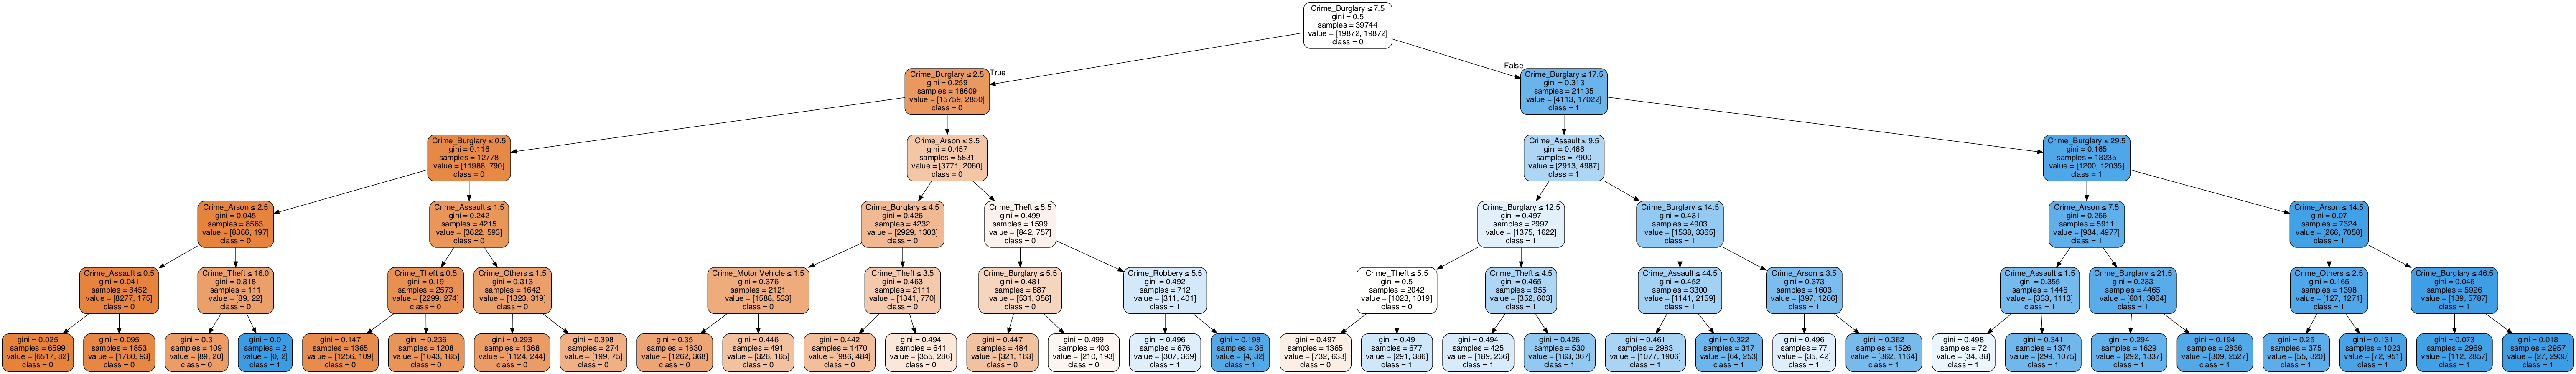

In [13]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import sklearn as sk 

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini.png')
Image(graph.create_png())

**Random Forrest**

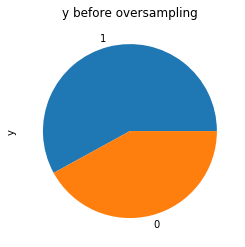

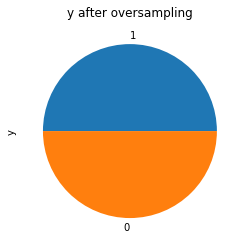

In [14]:
# use oversampling
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')

feature_cols = ["Crime_Arson","Crime_Assault","Crime_Burglary","Crime_Homicide","Crime_Motor Vehicle","Crime_Others","Crime_Robbery","Crime_Theft","Crime_Vice","Crime_Violence"]

df_train=new_df1[new_df1['Year'].isin([2010,2011,2012,2013,2014,2015])]
X_train=df_train[feature_cols]
y_train=df_train.y.astype('int')

# performs oversampling
y_train.value_counts().plot(kind='pie')
plt.title('y before oversampling')
plt.show()
X_train, y_train = ros.fit_resample(X_train, y_train)
y_train.value_counts().plot(kind='pie')
plt.title('y after oversampling')
plt.show()

df_test=new_df1[new_df1['Year'].isin([2016])]
X_test=df_test[feature_cols]
y_test=df_test.y.astype('int')


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf_RF=RandomForestClassifier(n_estimators=100)
clf_RF.fit(X_train , y_train)
y_pred=clf_RF.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

([tn,fp],[fn,tp])= sk.metrics.confusion_matrix(y_test, y_pred)
R=recall(tp,tn,fp,fn)
print('recall:', R)
P=precision(tp,tn,fp,fn)
print('precision:', P)

Accuracy: 0.8245798319327731
recall: 0.8828264758497316
precision: 0.8294117647058824


In [16]:
len(y_pred)/1428

4.0

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

y_train_logreg=y_train.astype('int')
y_test = y_test.astype('int')

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train_logreg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81110


In [20]:
([tn,fp],[fn,tp])= sk.metrics.confusion_matrix(y_test, y_pred)
R=recall(tp,tn,fp,fn)
print('recall:', R)
P=precision(tp,tn,fp,fn)
print('precision:', P)

recall: 0.77072152653548
precision: 0.8929188255613126
